### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Importing Data

In [2]:
df = pd.read_csv('dataset.csv')
df = df.iloc[:, 1:]

display(df.head())
display(df.columns)
display(df.dtypes)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Data Cleaning

In [3]:
display(df.isna().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
df['explicit'] = df['explicit'].astype(int)
df['explicit'].value_counts()

0    104253
1      9747
Name: explicit, dtype: int64

## Exploratory Data Analysis

In [5]:
display(df.dtypes)

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [6]:
summary = df.describe().T
display(summary)

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
explicit,114000.0,0.085500,0.279626,0.000,0.00000,0.000000,0.0000,1.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [7]:
display(df['album_name'].value_counts())
display(df['artists'].value_counts())
display(df['track_genre'].value_counts())

Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
Me Alcançou                      1
Comunhão e Adoração              1
Força Pra Encarar                1
The Way of the Fist              1
Revelation Songs                 1
Name: album_name, Length: 46589, dtype: int64

The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: artists, Length: 31437, dtype: int64

acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

#### Missing Values

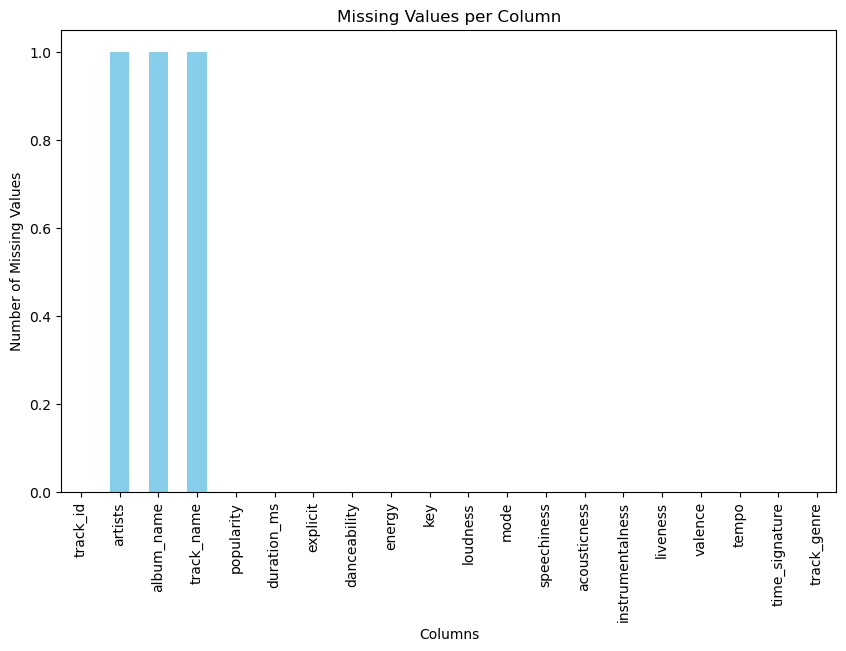

In [9]:
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

Let's find where those 3 missing values are and if they all are in the same song/row or not:

In [10]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


All the missing values are in the row above, and it looks like even non-missing values, some of them, contain the equivalent of null. For example, the duration here is 0, which would be the same as null since a song cannot have a duration of 0 if the value is inputted correctly.

Considering the missing and invalid values in this row, it would be best for our analysis to remove it from the dataset.

In [11]:
df = df.drop(index=65900)
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


#### Valid Values

For some of the columns, we know the range the values can take. So, based on that, we can calculate the number of inputs that are outside of the given range for each column that has a range of valid values.

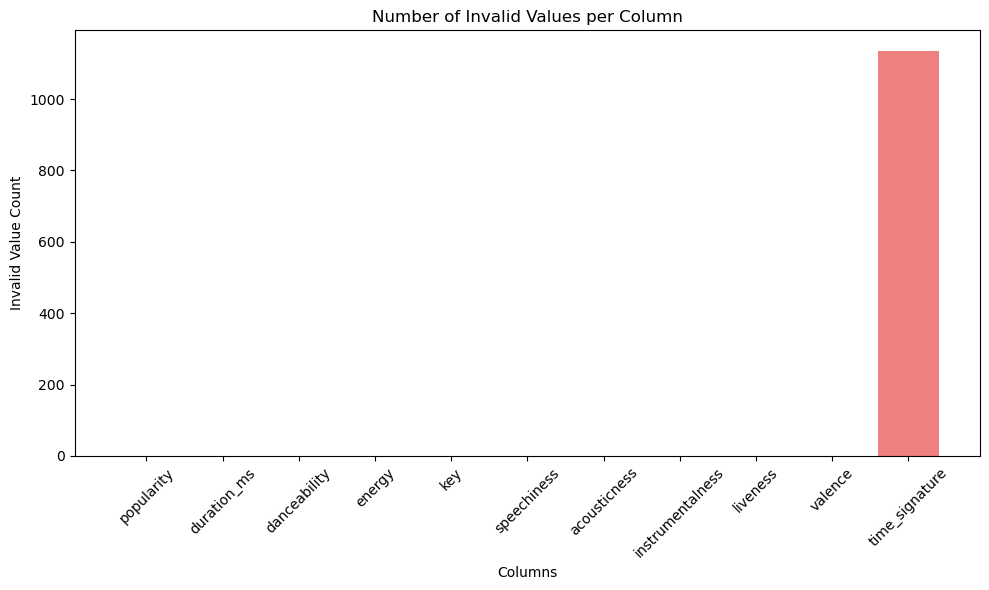

,Column,Invalid Values
0,popularity,0
1,duration_ms,0
2,danceability,0
3,energy,0
4,key,0
5,speechiness,0
6,acousticness,0
7,instrumentalness,0
8,liveness,0
9,valence,0


In [12]:
ranges = {
    'popularity': (0, 100),
    'duration_ms': (1, float('inf')),
    'danceability': (0.0, 1.0),
    'energy': (0.0, 1.0),
    'key': (-1, 11), 
    'speechiness': (0.0, 1.0),
    'acousticness': (0.0, 1.0),
    'instrumentalness': (0.0, 1.0),
    'liveness': (0.0, 1.0),
    'valence': (0.0, 1.0),
    'time_signature': (3, 7), 
}

def count_invalid_values(df, ranges):
    invalid_counts = {}
    
    for col, (min_val, max_val) in ranges.items():
        invalid_counts[col] = ((df[col] < min_val) | (df[col] > max_val)).sum()
    
    return invalid_counts

invalid_counts = count_invalid_values(df, ranges)

invalid_df = pd.DataFrame(list(invalid_counts.items()), columns=['Column', 'Invalid Values'])

plt.figure(figsize=(10, 6))
plt.bar(invalid_df['Column'], invalid_df['Invalid Values'], color='lightcoral')
plt.xticks(rotation=45)
plt.title('Number of Invalid Values per Column')
plt.xlabel('Columns')
plt.ylabel('Invalid Value Count')
plt.tight_layout()
plt.show()
invalid_df

In [13]:
df[(df['time_signature'] < 3) | (df['time_signature'] > 7)]['time_signature'].unique()

array([1, 0])

In [14]:
df['time_signature'].value_counts()

4    101842
3      9195
5      1826
1       973
0       163
Name: time_signature, dtype: int64

In [15]:
df[(df['time_signature'] < 3) | (df['time_signature'] > 7)]['time_signature'].value_counts()

1    973
0    163
Name: time_signature, dtype: int64

In [16]:
# getting rid of the rows where time signature is invalid
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]
display(df.head())

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#### Distribution of Popularity

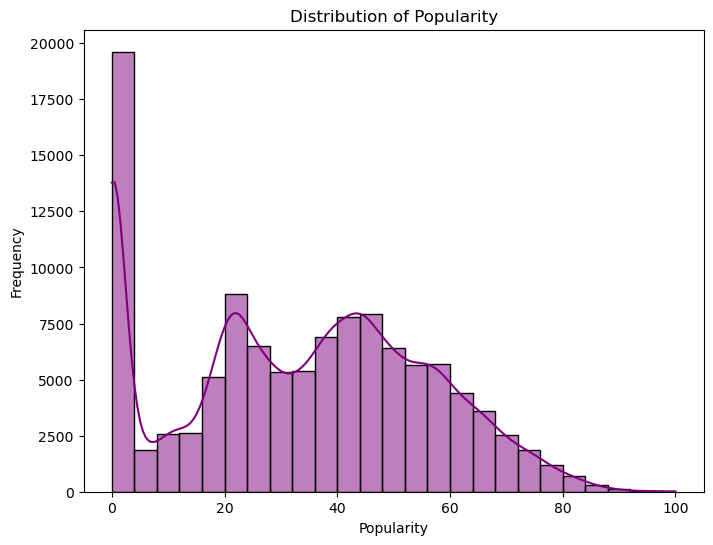

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True, color='purple', bins=25)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#### Various Features Distribution

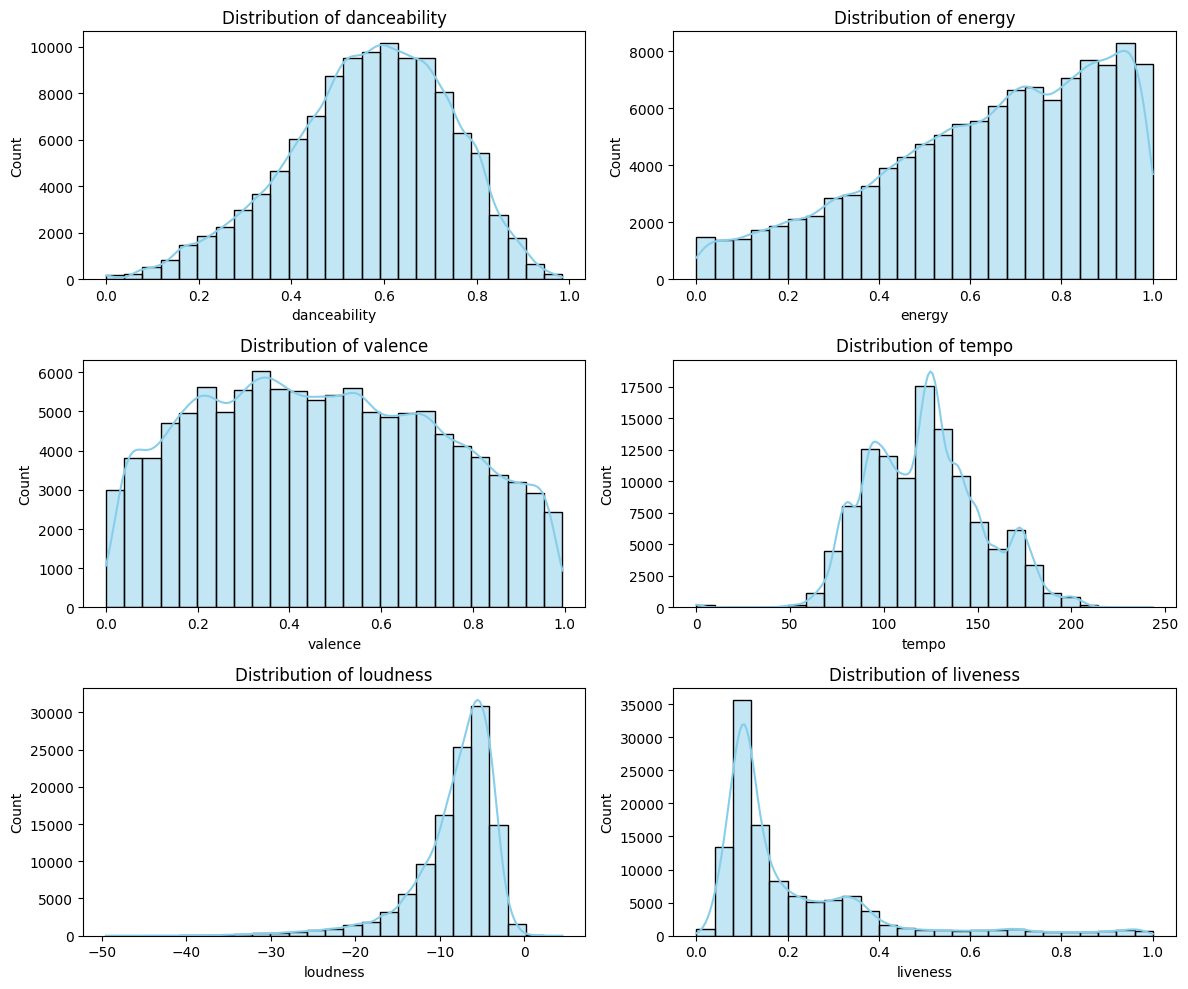

In [178]:
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'liveness']
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, color='skyblue', bins=25, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

#### Popularity vs. Track Duration

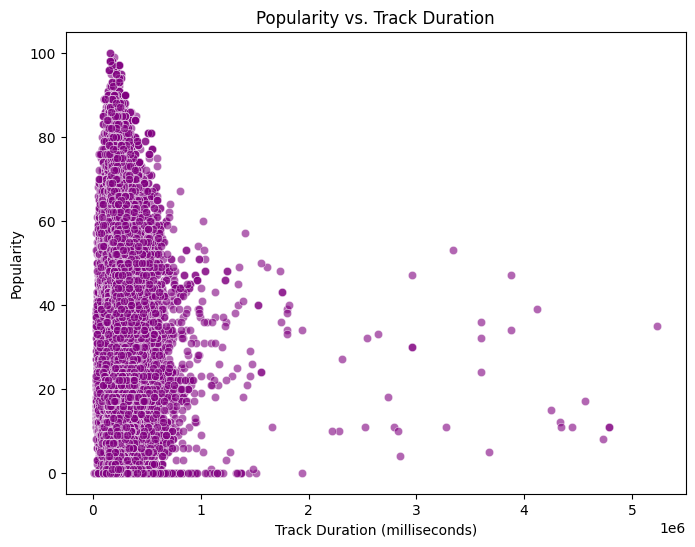

In [179]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], color='purple', alpha=0.6)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Track Duration (milliseconds)')
plt.ylabel('Popularity')
plt.show()

#### Popularity Distribution by Explicit Lyrics

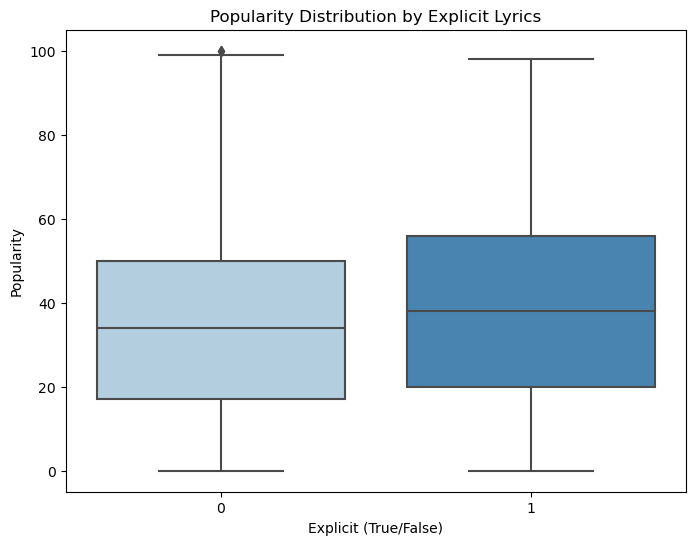

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=df, palette='Blues' )
plt.title('Popularity Distribution by Explicit Lyrics')
plt.xlabel('Explicit (True/False)')
plt.ylabel('Popularity')
plt.show()

#### Top 10 Genres by Average Popularity

In [18]:
df['track_genre'].nunique()

114

There are 114 different genres in our dataset, so plotting all of them will be difficult to interpret. Instead, we can plot the top 10 genres based on their average popularity scores.

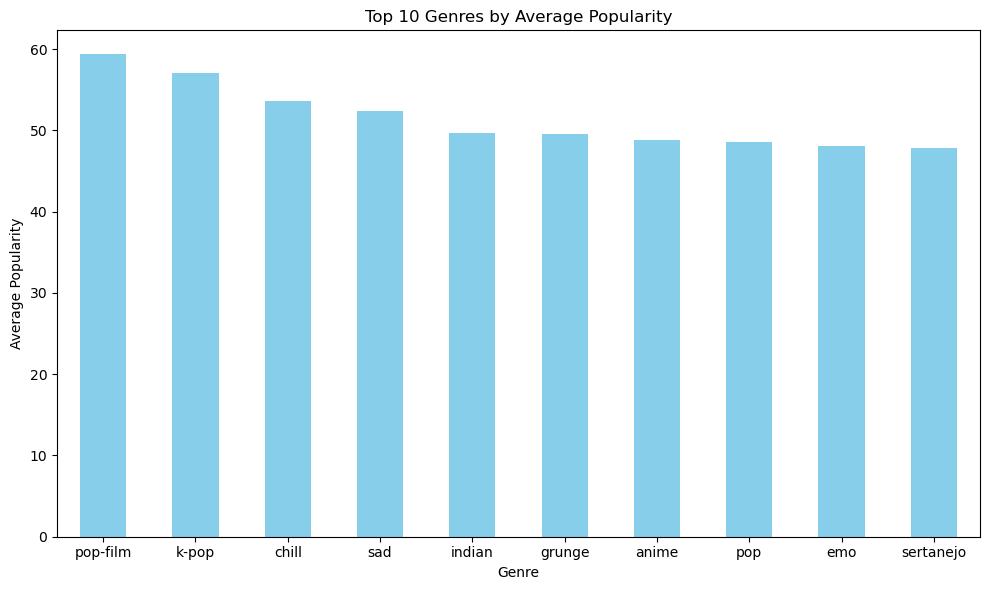

In [19]:
top_n_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_n_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Top 10 Artists by Average Popularity

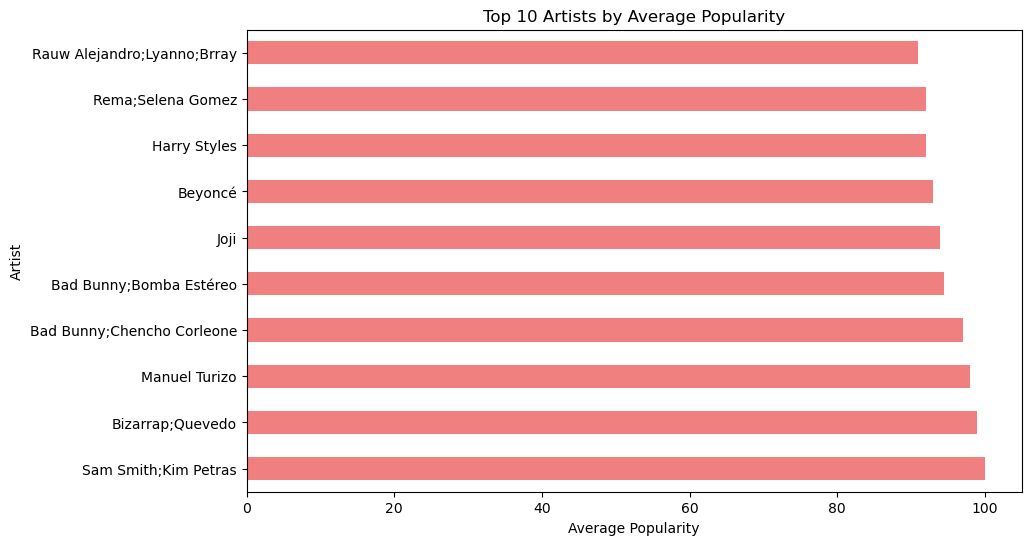

In [22]:
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
artist_popularity.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

#### Top 10 Albums by Average Popularity

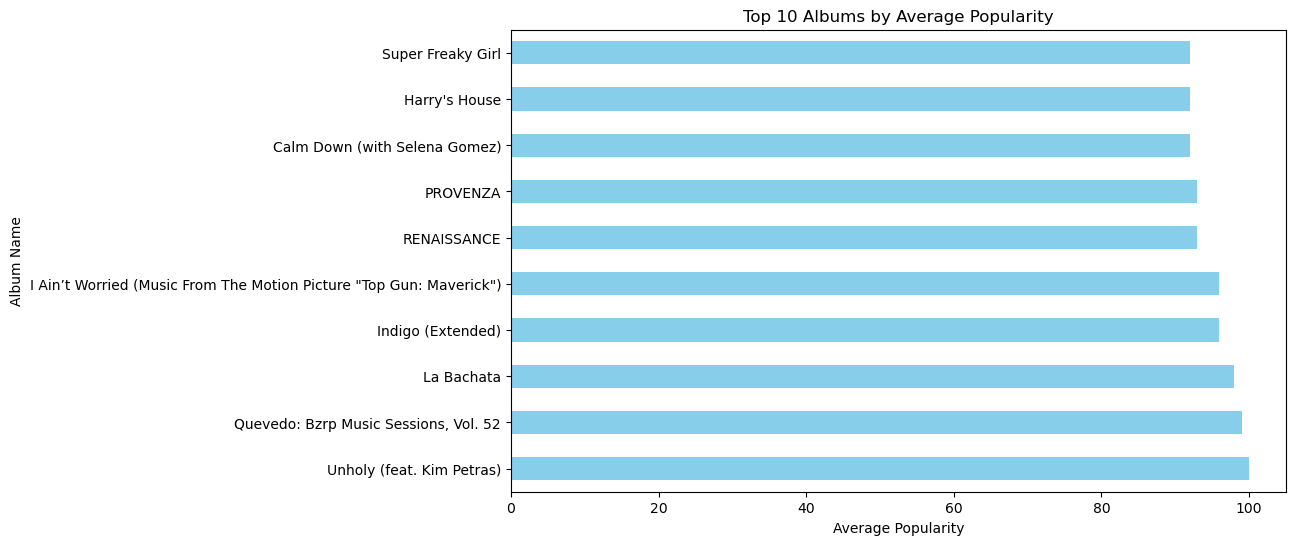

In [23]:
album_popularity = df.groupby('album_name')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
album_popularity.plot(kind='barh', color='skyblue')
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album Name')
plt.show()

#### Correlation Heatmap

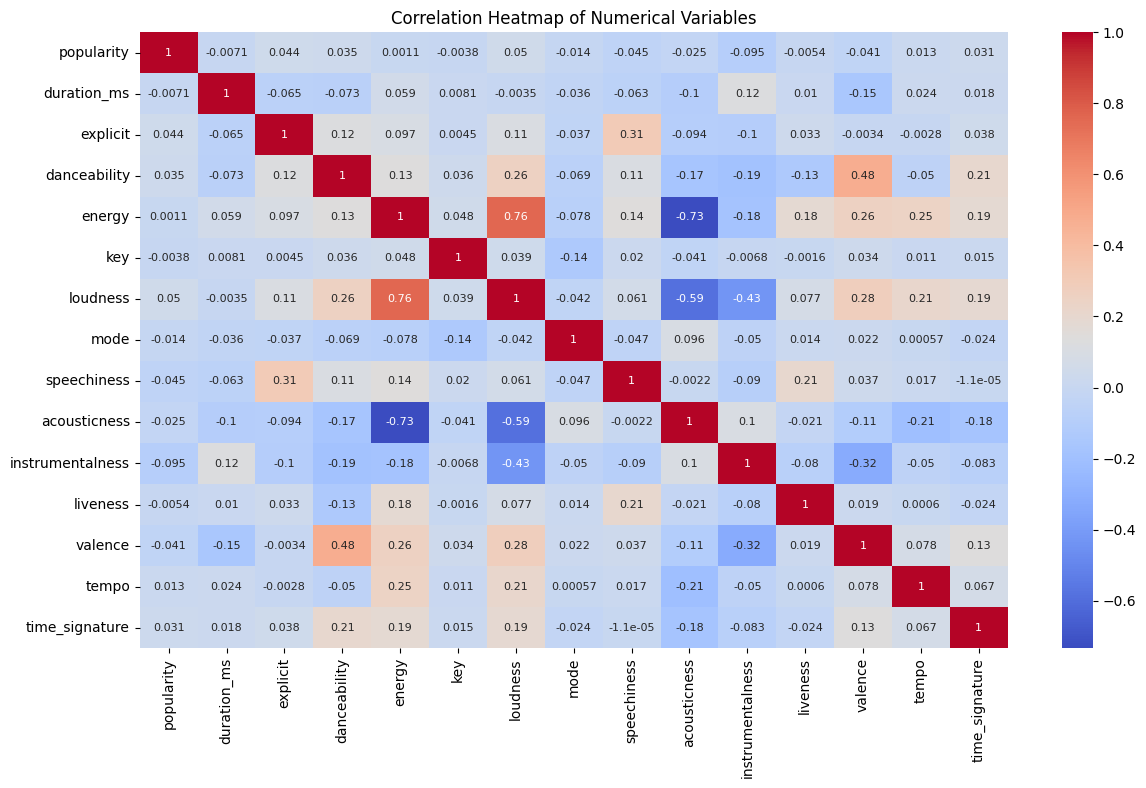

In [176]:
numerical= df.select_dtypes(exclude = ['object'])
correlation_matrix = numerical.corr()

plt.figure(figsize = (14, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Data Analysis

In [25]:
df['popularity'].value_counts()
display(summary)

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
explicit,114000.0,0.085500,0.279626,0.000,0.00000,0.000000,0.0000,1.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [26]:
display(df.select_dtypes(exclude=['object']).head())

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [27]:
scaler = StandardScaler()

cols_to_scale = ['duration_ms', 'tempo']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
summary = df.describe().T
display(summary)

,count,mean,std,min,25%,50%,75%,max
popularity,112863.0,3.326934e+01,22.333646,0.000000,17.000000,35.00000,50.000000,100.000000
duration_ms,112863.0,9.871535e-17,1.000004,-2.004551,-0.506947,-0.14303,0.314685,47.255145
explicit,112863.0,8.564366e-02,0.279838,0.000000,0.000000,0.00000,0.000000,1.000000
danceability,112863.0,5.688367e-01,0.171772,0.051300,0.458000,0.58200,0.695000,0.985000
energy,112863.0,6.436844e-01,0.249659,0.000020,0.475000,0.68600,0.854000,1.000000
key,112863.0,5.312326e+00,3.560344,0.000000,2.000000,5.00000,8.000000,11.000000
loudness,112863.0,-8.199521e+00,4.945812,-46.591000,-9.955000,-6.97500,-4.991000,4.532000
mode,112863.0,6.372416e-01,0.480798,0.000000,0.000000,1.00000,1.000000,1.000000
speechiness,112863.0,8.441262e-02,0.104344,0.022100,0.035900,0.04900,0.084600,0.965000
acousticness,112863.0,3.122653e-01,0.330916,0.000000,0.016700,0.16600,0.591000,0.996000


# Linear Regression

In [28]:
formula = "popularity ~ duration_ms + explicit + danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + time_signature"
model = smf.ols(formula, data=df).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:22:51   Log-Likelihood:            -5.0925e+05
No. Observations:              112863   AIC:                         1.019e+06
Df Residuals:                  112848   BIC:                         1.019e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.9671      1.030     30.069      0.000      28.949      32.986
duration_ms         -0.1723      0.068     -2.549      0.011      -0.305      -0.040
explicit             3.5084      0.250     14.011      0.000       3.018       3.999
danceability         8.0367      0.472     17.031      0.000       7.112       8.962
energy              -3.1722      0.546     -5.813      0.000      -4.242      -2.103
key                 -0.0297      0.019     -1.591      0.112      -0.066       0.007
loudness             0.1337      0.024      5.558      0.000       0.087       0.181
mode                -0.7398      0.139     -5.310      0.000      -1.013      -0.467
speechiness        -15.2610      0.695    -21.943      0.000     -16.624     -13.898
acousticness        -0.5260      0.310     -1.696      0.090      -1.134       0.082
instrumentalness    -8.0098      0.258    -31.011      0.000      -8.516      -7.504
liveness             1.5825      0.370      4.279      0.000       0.858       2.307
valence             -9.3975      0.319    -29.470      0.000     -10.023      -8.773
tempo                0.5227      0.069      7.622      0.000       0.388       0.657
time_signature       2.0380      0.221      9.210      0.000       1.604       2.472
==============================================================================
Omnibus:                    12254.782   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3415.302
Skew:                          -0.022   Prob(JB):                         0.00
Kurtosis:                       2.149   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-squared value is 0.025 which means that our model only explains 2.5% variance in popularity. This means that there may be other factors not included in our dataset that influence our target variable popularity. Many predictors have p-values < 0.05, meaning they have a significant impact on popularity.  

In [29]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: duration_ms:  1.061
VIF: explicit:  1.140
VIF: danceability:  1.525
VIF: energy:  4.309
VIF: key:  1.021
VIF: loudness:  3.284
VIF: mode:  1.042
VIF: speechiness:  1.223
VIF: acousticness:  2.445
VIF: instrumentalness:  1.466
VIF: liveness:  1.141
VIF: valence:  1.579
VIF: tempo:  1.092
VIF: time_signature:  1.062


In [30]:
import statsmodels.api as sm
dw_stat = sm.stats.durbin_watson(model.resid)
display(dw_stat)

0.5714994324746292

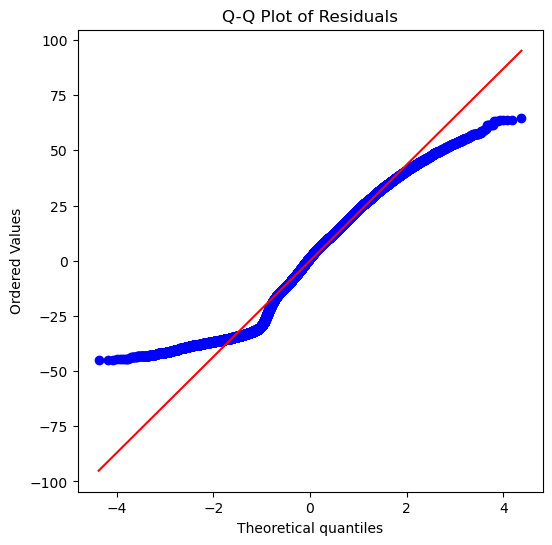

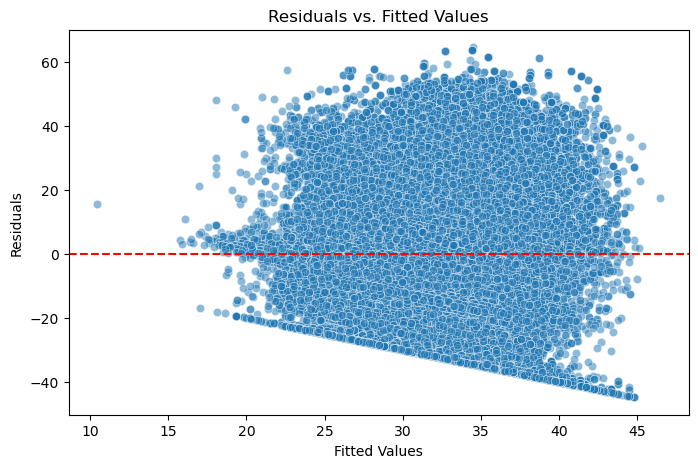

In [31]:
residuals = model.resid
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

fitted_values = model.fittedvalues
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


* Homoscedasticity is not satisfied from the Residuals vs. Fitted Values becaue there is a pattern with the residuals against the fitted values. There is heteroscedasticity.
* Our Durbin-Watson statistic is 0.571 suggests positive autocorrelation in the residuals.
* The residuals in the Q-Q plot deviate significantly on both tails. There are heavy tails which suggests non-linearity. Three is non normality based off of the Q-Q plot.
* All VIF are less than 5 meaning that multicollinearity is not a major concern. Our highest VIF are energy: 4.268 and loudness: 3.286.

# Logistic Regression

Optimization terminated successfully.
         Current function value: 0.537704
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      binary_popularity   No. Observations:                90290
Model:                          Logit   Df Residuals:                    90275
Method:                           MLE   Df Model:                           14
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                 0.03304
Time:                        01:22:54   Log-Likelihood:                -48549.
converged:                       True   LL-Null:                       -50208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3009      0.128     -2.352      0.019      -0.552      -0.050
duration_ms         -0.1549      0.011    -14.150      0.000      -0.176      -0.133
explicit             0.4142      0.028     14.710      0.000       0.359       0.469
danceability         0.7640      0.057     13.316      0.000       0.652       0.876
energy              -0.7274      0.067    -10.829      0.000      -0.859      -0.596
key                 -0.0013      0.002     -0.568      0.570      -0.006       0.003
loudness             0.0126      0.003      4.124      0.000       0.007       0.019
mode                -0.1322      0.017     -7.954      0.000      -0.165      -0.100
speechiness         -1.7619      0.105    -16.749      0.000      -1.968      -1.556
acousticness        -0.5408      0.038    -14.162      0.000      -0.616      -0.466
instrumentalness    -0.8375      0.034    -24.742      0.000      -0.904      -0.771
liveness            -0.9300      0.051    -18.366      0.000      -1.029      -0.831
valence             -0.9313      0.039    -23.927      0.000      -1.008      -0.855
tempo               -0.0209      0.008     -2.495      0.013      -0.037      -0.004
time_signature       0.1000      0.028      3.620      0.000       0.046       0.154
====================================================================================
"""

array([[17005,    52],
       [ 5480,    36]])

<Figure size 1000x800 with 0 Axes>

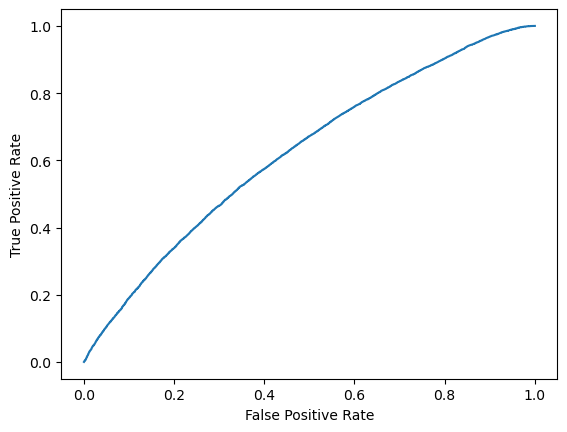

0.6225913950252455

In [32]:
df["binary_popularity"] = (df["popularity"] > 50).astype(int)

features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
pop_features = df.dropna(subset=features + ["binary_popularity"])
train, test = train_test_split(df.dropna(subset=features + ["binary_popularity"]), test_size=0.2, random_state=42, stratify=df["binary_popularity"])
formula = "binary_popularity ~ " + " + ".join(features)
logit_model = smf.logit(formula=formula, data=train).fit()
display(logit_model.summary())
test_preds = logit_model.predict(test) >= 0.5

c_matrix = metrics.confusion_matrix(test["binary_popularity"], test_preds)
display(c_matrix)

true_pos = c_matrix[1, 1] / c_matrix[1].sum()
true_neg = c_matrix[0, 0] / c_matrix[0].sum()
false_pos = c_matrix[0, 1] / c_matrix[0].sum()
false_neg = c_matrix[1, 0] / c_matrix[1].sum()

fpr, tpr, thresholds = metrics.roc_curve(df['binary_popularity'], logit_model.predict(df))

indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]

plt.figure(figsize=(10, 8))
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

display(metrics.roc_auc_score(test['binary_popularity'], logit_model.predict(test)))

* negative effect on popularity: duration_ms, energy, key, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature
* positive effect on popularity: explicit, danceability, loudness, time_signature

* Our model performs a little better than just random guessing 50% but it has a low recall of 0.01. 

* Since our model has a low variance of 3.3%, this means that the features in our analysis determines a small portion of the song's popularity. There are probably other features that are not within our dataset that might contribute to the songs popularity.

# Ridge

In [39]:
features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = df[features]
y = df['binary_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)


ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

display(mse, r2)

coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

display(intercept)

0.17724599147011558

0.03701726705568287

duration_ms: -0.017677905506962903
explicit: 0.08585377832321887
danceability: 0.1326736616045992
energy: -0.1195055480536025
key: -0.0007346588859178263
loudness: 0.0014881555374444706
mode: -0.026970812751309352
speechiness: -0.24570706043030155
acousticness: -0.08208621661918256
instrumentalness: -0.14032721266488707
liveness: -0.14135282806666966
valence: -0.1538888555404759
tempo: -0.002931683787449459
time_signature: 0.013894675484543635


0.3889166114756548

* negative coefficients: speechiness, instrumentalness, liveness, energy, and acousticness
- when these features increase, the predicted target values tend to decrease

* positive coefficients: explicit, danceability, time_signature
- these features tend to increase the predicted target

* small coefficients: key, loudness, tempo
- these have a very minimal impact on popularity compare to the other features

# PCA

/Users/buttz/miniforge3/envs/dsc80/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


array([0.21043919, 0.11157953])

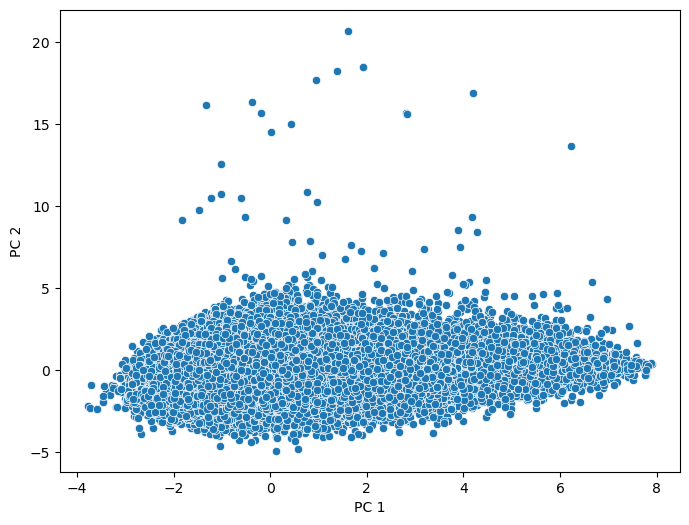

In [34]:

from sklearn.decomposition import PCA
cols_to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature']

scaler = StandardScaler()
X.loc[:, cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)
display(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

* explained variance ratio tells us how much the total variance is being captured by each principal component
* PC1 captures 21.04%
* PC2 captures 11.16% 
* total variance is 32.2%
* our predicted features have a distinct distribution with most of the data points clustered together, there are some outliers that drop from below the main cluster
* since we have a variance of 21.04% and 11.16%  this shows significant correlation with our features
* since our total variance is 32.2%, this suggests that our features contain complex relationships that can't jsut be reduced to two dimensions
* The outliers represent the songs that have significantly different feature paterns compared the the majority of the data, these songs could have an unusual combination of features that affect the popularity in different ways compared to the majority of the songs
 * Even with 5 principal components, we only capture about 58% of the variance meaning we need more components to capture the full complexity of the popularity

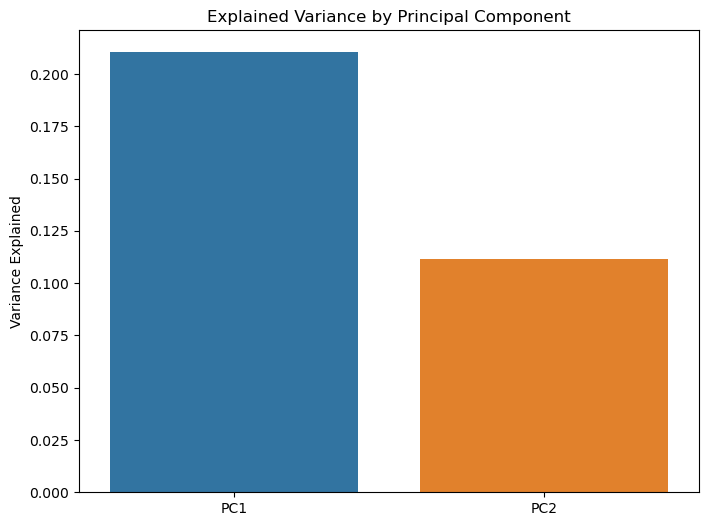

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Component')
plt.ylabel('Variance Explained')
plt.show()

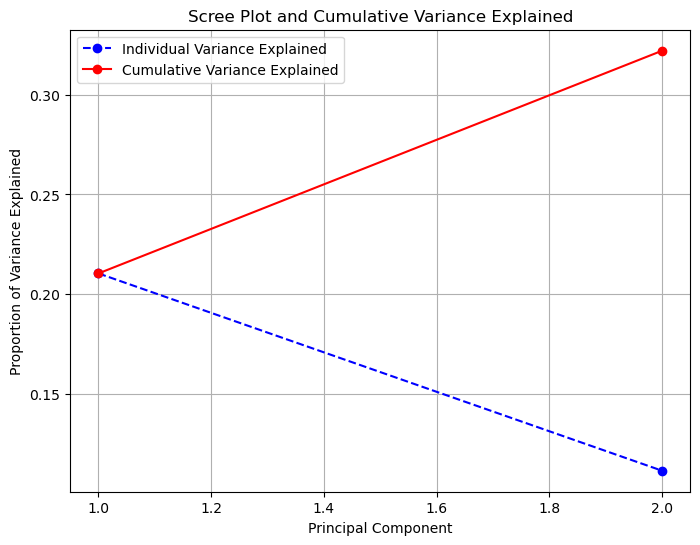

In [36]:
n_components = 2  

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b', label='Individual Variance Explained')
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='r', label='Cumulative Variance Explained')
plt.title('Scree Plot and Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/Users/buttz/miniforge3/envs/dsc80/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


array([0.21043919, 0.11158012, 0.09645365, 0.08666401, 0.07468497])

array([0.21043919, 0.32201931, 0.41847296, 0.50513697, 0.57982194])

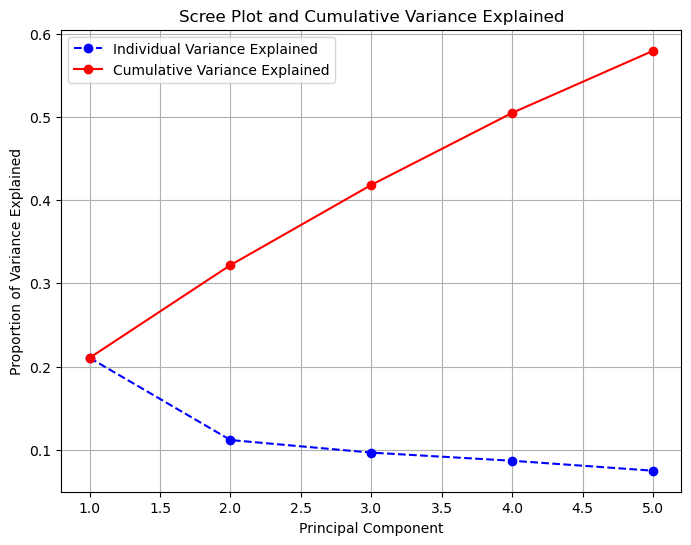

In [37]:
 
cols_to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature']

scaler = StandardScaler()
X.loc[:, cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
n_components = 5
pca = PCA(n_components=n_components)  
X_pca = pca.fit_transform(X_scaled)

display(pca.explained_variance_ratio_)
display(pca.explained_variance_ratio_.cumsum())

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b', label='Individual Variance Explained')
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='r', label='Cumulative Variance Explained')
plt.title('Scree Plot and Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend(loc='best')
plt.grid(True)
plt.show()

* If we include 5 components, we are explaining 57.98% of the variance in our data
* we used PCA to reduce dimensionality of the dataset while retaining as much variance as possible. 
* We found that the first 3 components explain 41.84% of the variance. This is a good balance between reducing complexity and retaining the information
* since we have a low 

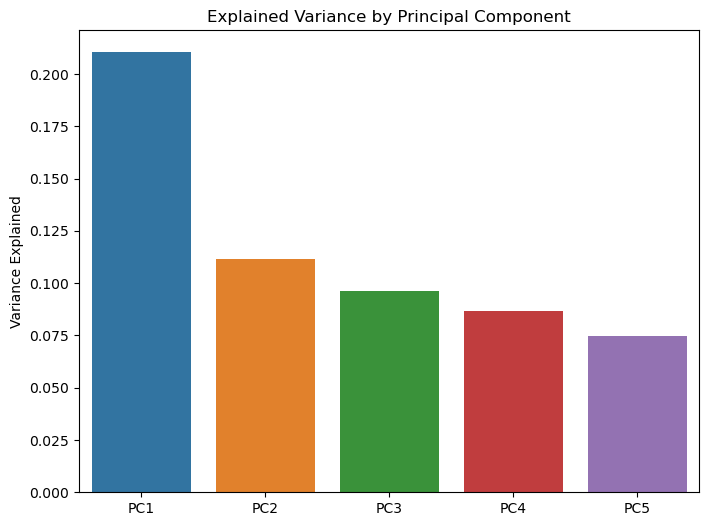

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Component')
plt.ylabel('Variance Explained')
plt.show()